# Evaluating GradCAM on different Images
Here we test our GradCam implementation on its ability to discriminate between classes. We also test our counterfactual gradcam implementation and report our observations. 

In [ ]:
# Importing necessary libraries
from GradCam import GradCam

from torchvision import models as pretrained
from PIL import Image, ImageDraw

from typing import List, Union

import torch

from IPython.display import display
import numpy as np
from imagenet_classes import classes

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [3]:
# We decided to use the VGG19 model as it has the best GradCAM output 
model = pretrained.vgg19(pretrained=True)
gc = GradCam(model, model.features[35], device)

In [4]:
# Loading a sample image and checking the networks top 6 classifications
image = Image.open('./sample_images/dog_and_cat.jpeg')
labels = gc.topk(image, 6)
for lab in labels:
    print(lab, classes[lab])


260 chow, chow chow
207 golden retriever
186 Norwich terrier
273 dingo, warrigal, warragal, Canis dingo
185 Norfolk terrier
281 tabby, tabby cat


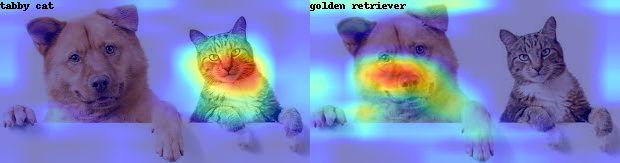

In [6]:
hm_cat = gc(image, torch.tensor([281]))
hm_dog = gc(image, torch.tensor([207]))
ImageDraw.Draw(hm_cat).text((0, 0), "tabby cat", (0, 0, 0))
ImageDraw.Draw(hm_dog).text((0, 0), "golden retriever", (0, 0, 0))
heatmaps = Image.fromarray(np.hstack([np.array(hm) for hm in [hm_cat, hm_dog]]))
display(heatmaps)

The above class activation maps indicate that the network is able to localize the different classes and identify pertinent regions with a significant accuracy. Below we also see that the network is a little more sure about what doesn't contribute to the output (the CAM over the dog is a lot more restricted to one area in the case of the counterfactual CAM for the tabby cat class than the normal CAM for the golden retriever class). 

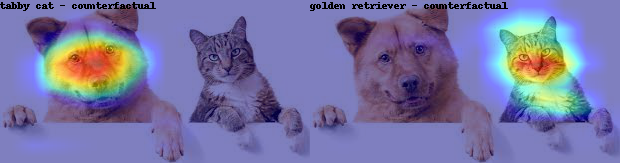

In [8]:
hm_cat_cf = gc(image, torch.tensor([281]), counterfactual=True)
hm_dog_cf = gc(image, torch.tensor([207]), counterfactual=True)
ImageDraw.Draw(hm_cat_cf).text((0, 0), "tabby cat - counterfactual", (0, 0, 0))
ImageDraw.Draw(hm_dog_cf).text((0, 0), "golden retriever - counterfactual", (0, 0, 0))
heatmaps = Image.fromarray(np.hstack([np.array(hm) for hm in [hm_cat_cf, hm_dog_cf]]))
display(heatmaps)

In [19]:
image = Image.open('./sample_images/balls.jpg')
image = image.resize((image.size[0]//3, image.size[1]//3))
labels = gc.topk(image, 6)
for lab in labels:
    print(lab, classes[lab])


522 croquet ball
890 volleyball
430 basketball
805 soccer ball
722 ping-pong ball
852 tennis ball


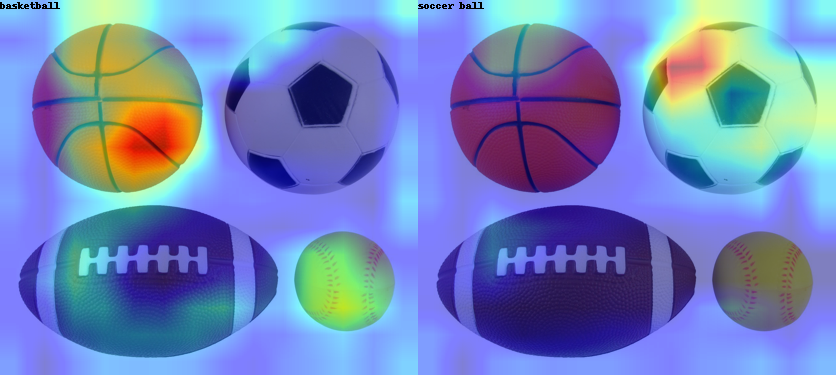

In [22]:
hm_basketball = gc(image, torch.tensor([430]))
hm_soccerball = gc(image, torch.tensor([805]))
ImageDraw.Draw(hm_basketball).text((0, 0), "basketball", (0, 0, 0))
ImageDraw.Draw(hm_soccerball).text((0, 0), "soccer ball", (0, 0, 0))
heatmaps = Image.fromarray(np.hstack([np.array(hm) for hm in [hm_basketball, hm_soccerball]]))
display(heatmaps)

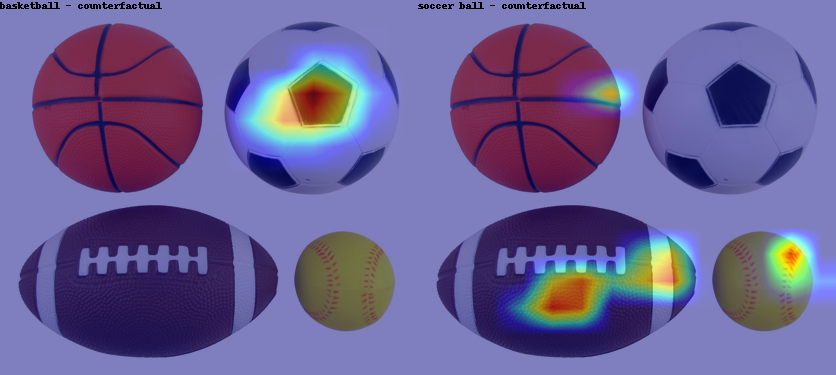

In [23]:
hm_basketball_cf = gc(image, torch.tensor([430]), counterfactual=True)
hm_soccerball_cf = gc(image, torch.tensor([805]), counterfactual=True)
ImageDraw.Draw(hm_basketball_cf).text((0, 0), "basketball - counterfactual", (0, 0, 0))
ImageDraw.Draw(hm_soccerball_cf).text((0, 0), "soccer ball - counterfactual", (0, 0, 0))
heatmaps = Image.fromarray(np.hstack([np.array(hm) for hm in [hm_basketball_cf, hm_soccerball_cf]]))
display(heatmaps)

From the above class activation maps we can conclude that the VGG19 network learns to look at multiple regions to try and classify an image (given a class) and looks for very specifit information to conclude that an image does not belong to a particular class. For example in the above image, the counterfactual CAM for the class basketball has a large intensity over the black pentagon surrounded by white, a property that is characteristic of footballs. 